In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [8]:
df = pd.read_csv('gurgaon_properties_outlier_treated.csv')

In [4]:
df.duplicated().sum()

0

In [5]:
df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,ambience creacions,6.00,sector 22,2053.0,29221.0,Carpet area: 3000 (278.71 sq.m.),4,5,3+,10.0,South-East,New Property,NaN,NaN,NaN,3000.0,0,1,0,1,0,2,49,7305.25
1,m3m woodshire,1.00,sector 107,750.0,13340.0,Super Built up area 1534(142.51 sq.m.)Carpet a...,2,2,3,0.0,North-East,Relatively New,NaN,1534.0,NaN,1056.0,1,0,0,0,0,1,29,6670.00
2,satya the legend,9.25,sector 57,16577.0,5580.0,Plot area 642(536.79 sq.m.)Built Up area: 630 ...,5,5,3+,4.0,North-East,Relatively New,house,NaN,630.0,620.0,1,1,1,1,0,2,160,1116.00
3,vatika gurgaon,0.07,sector 83,627.0,1117.0,Super Built up area 1245(115.66 sq.m.)Built Up...,2,2,2,3.0,South-East,Relatively New,NaN,1245.0,850.0,790.0,1,0,0,1,0,2,165,558.50
4,dlf the arbour,8.50,sector 63,21519.0,3950.0,Built Up area: 3950 (366.97 sq.m.),4,4,3+,27.0,NaN,Undefined,house,NaN,3950.0,NaN,0,0,0,0,0,1,61,987.50


In [12]:
df.isnull().sum()

society                   1
price                     0
sector                    0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                  994
agePossession             0
property_type          2808
super_built_up_area    1631
built_up_area          1969
carpet_area            1669
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [13]:
df['property_type'].fillna('flat',inplace=True)

In [14]:
df.isnull().sum()

society                   1
price                     0
sector                    0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                  994
agePossession             0
property_type             0
super_built_up_area    1631
built_up_area          1969
carpet_area            1669
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

#### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

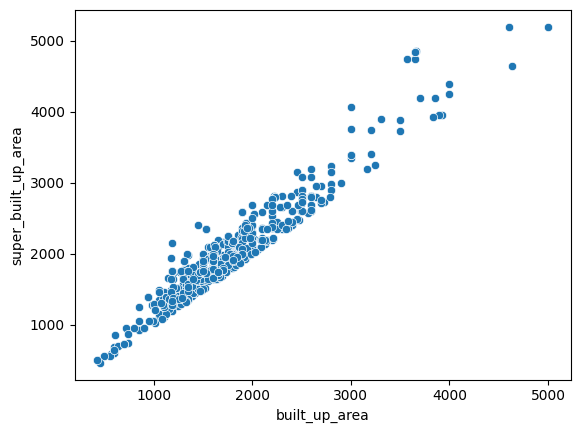

In [16]:
sns.scatterplot(x=df['built_up_area'], y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

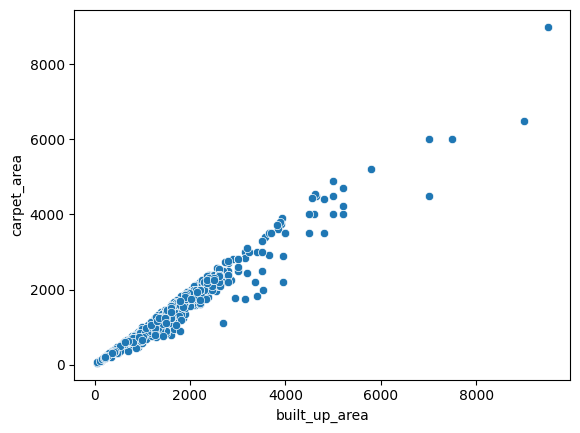

In [17]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [18]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))


0       False
1       False
2       False
3       False
4       False
        ...  
3500    False
3501    False
3502    False
3503    False
3504    False
Length: 3505, dtype: bool

In [21]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [22]:
all_present_df.shape

(531, 24)

In [23]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [24]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [25]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [26]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [27]:
sbc_df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,m3m woodshire,1.00,sector 107,750.0,13340.0,Super Built up area 1534(142.51 sq.m.)Carpet a...,2,2,3,0.0,North-East,Relatively New,flat,1534.0,NaN,1056.0,1,0,0,0,0,1,29,6670.0
16,mapsko paradise,0.07,sector 83,560.0,1251.0,Super Built up area 1340(124.49 sq.m.)Carpet a...,3,3,3,10.0,North,New Property,flat,1340.0,NaN,1000.0,0,0,0,0,1,2,49,417.0
41,viridian the plaza 106,0.03,sector 106,557.0,539.0,Super Built up area 700(65.03 sq.m.)Carpet are...,1,1,1,7.0,East,Relatively New,flat,700.0,NaN,450.0,0,0,0,0,0,1,130,539.0
44,bptp terra,1.00,sector 37d,950.0,10530.0,Super Built up area 1811(168.25 sq.m.)Carpet a...,3,3,3,9.0,South,Relatively New,flat,1811.0,NaN,996.3,1,0,0,0,0,2,24,3510.0
58,signature global the millennia,0.06,sector 37d,1091.0,550.0,Super Built up area 650(60.39 sq.m.)Carpet are...,2,2,3,0.0,NaN,New Property,flat,650.0,NaN,596.0,0,0,0,0,0,1,40,275.0


In [28]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

/var/folders/rb/0njqjp6d1fb2sbqjjl26fh7h0000gn/T/ipykernel_13479/1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


In [29]:
df.update(sbc_df)

In [30]:
df.isnull().sum()

society                   1
price                     0
sector                    0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                  994
agePossession             0
property_type             0
super_built_up_area    1631
built_up_area          1548
carpet_area            1669
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [31]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [32]:
sb_df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
8,microtek greenburg,1.00,sector 86,845.0,11840.0,Super Built up area 2285(212.28 sq.m.),3,4,3,12.0,East,Relatively New,flat,2285.0,NaN,NaN,0,1,0,0,0,1,72,3946.666667
12,pareena coban residences,1.00,sector 99a,616.0,16236.0,Super Built up area 1997(185.53 sq.m.),3,5,3,5.0,North-East,Relatively New,flat,1997.0,NaN,NaN,0,1,0,0,0,1,99,5412.000000
14,raheja vedaanta,0.08,sector 108,408.0,1961.0,Super Built up area 1838(170.76 sq.m.),3,3,3,9.0,North-East,Relatively New,flat,1838.0,NaN,NaN,0,0,0,1,0,1,174,653.666667
20,shree vardhman flora,0.07,sector 90,461.0,1517.0,Super Built up area 1352(125.6 sq.m.),2,2,3,9.0,North-East,New Property,flat,1352.0,NaN,NaN,1,0,0,0,1,1,51,758.500000
24,tulip violet,1.00,sector 69,889.0,11251.0,Super Built up area 1350(125.42 sq.m.),2,3,1,0.0,North-West,Relatively New,flat,1350.0,NaN,NaN,0,0,0,0,0,1,150,5625.500000


In [33]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105), inplace=True)

/var/folders/rb/0njqjp6d1fb2sbqjjl26fh7h0000gn/T/ipykernel_13479/1215299602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105), inplace=True)


In [34]:
df.update(sb_df)

In [35]:
df.isnull().sum()

society                   1
price                     0
sector                    0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                  994
agePossession             0
property_type             0
super_built_up_area    1631
built_up_area           674
carpet_area            1669
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [36]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [37]:
c_df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,ambience creacions,6.00,sector 22,2053.0,29221.0,Carpet area: 3000 (278.71 sq.m.),4,5,3+,10.0,South-East,New Property,flat,NaN,NaN,3000.0,0,1,0,1,0,2,49,7305.25
5,m3m golfestate,1.00,sector 79,1000.0,10000.0,Carpet area: 1400 (130.06 sq.m.),2,2,2,4.0,East,Undefined,flat,NaN,NaN,1400.0,1,1,1,0,0,0,83,5000.00
6,bajrang apartments,0.03,sector 6,447.0,671.0,Carpet area: 850 (78.97 sq.m.),2,2,2,1.0,NaN,Moderately Old,flat,NaN,NaN,850.0,0,0,0,0,0,1,0,335.50
10,signature global park,0.05,sohna road,669.0,747.0,Carpet area: 822 (76.37 sq.m.),2,2,3,3.0,East,Undefined,flat,NaN,NaN,822.0,0,0,0,0,0,1,58,373.50
17,unitech escape,12.00,sector 50,37037.0,3240.0,Carpet area: 360 (301.01 sq.m.),5,6,3+,3.0,East,Undefined,house,NaN,NaN,360.0,0,0,0,0,0,1,66,648.00


In [38]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9), inplace=True)

/var/folders/rb/0njqjp6d1fb2sbqjjl26fh7h0000gn/T/ipykernel_13479/3473321853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9), inplace=True)


In [39]:
df.update(c_df)

In [40]:
df.isnull().sum()

society                   1
price                     0
sector                    0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                  994
agePossession             0
property_type             0
super_built_up_area    1631
built_up_area             0
carpet_area            1669
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

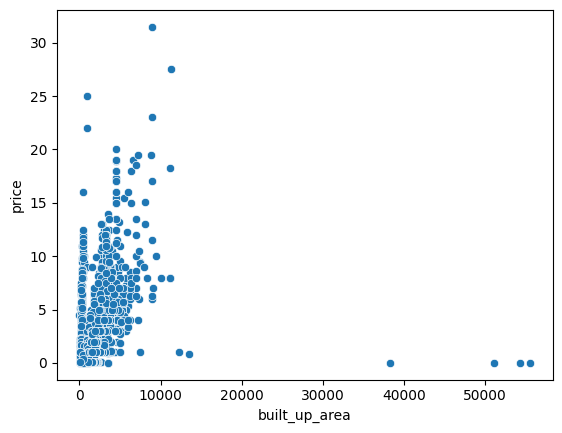

In [41]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [42]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [43]:
anamoly_df.sample(5)

,price,area,built_up_area
2847,22.0,8250.0,1000.0
2544,6.5,1836.0,215.0
1595,4.0,15432.0,1697.0
830,3.0,18215.0,1841.0
1865,4.5,3150.0,14.0
